# Experimento

In [14]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
import cv2

def blur(img, kernel_size = 3):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

def add_gaussian_noise(img, sigma):
	gauss = np.random.normal(0, sigma, np.shape(img))
	noisy_img = img + gauss
	noisy_img[noisy_img < 0] = 0
	noisy_img[noisy_img > 255] = 255
	return noisy_img

def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

def rgb2gray(rgb):
	return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [15]:
from skimage import exposure
from skimage import img_as_float
import numpy as np

def hist(img):
  return exposure.equalize_hist(img)

def adaptive_hist(img):
  imgInt = np.array(img, dtype=np.uint8)

  return exposure.equalize_adapthist(imgInt, clip_limit=0.03)

In [16]:
from scipy.signal import wiener

def wiener_filter(img):
  return wiener(img, (5,5))

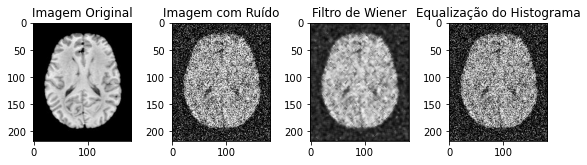

In [17]:
from skimage import data

# Load image and convert it to gray scale
file_name = os.path.join('test.jpg') 
img = rgb2gray(plt.imread(file_name))

noisyImg = add_gaussian_noise(img, 100)

# Apply Wiener Filter
wiener_filtered_img = wiener_filter(noisyImg)

# Apply Histogram Equalization
histogram_filtered_img = hist(noisyImg)

# Apply Histogram Equalization
pure_histogram_filtered_img = hist(img)

# Display results
display = [img, noisyImg, wiener_filtered_img, histogram_filtered_img]
# display = [img2, filtered_img]
label = ['Imagem Original', 'Imagem com Ruído', 'Filtro de Wiener', 'Equalização do Histograma']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
  fig.add_subplot(4, 5, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error

def AMBE(image_input, image_output):
  return abs(np.mean(image_input) - np.mean(image_output))

# Mean Square Error
def MSE(image_input, image_output):
  return mean_squared_error(image_input, image_output)

# Peak Signal to Noise Ratio
def PSNR(image_input, image_output, max_value=255):
  """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
  mse = np.mean((np.array(image_input, dtype=np.float32) - np.array(image_output, dtype=np.float32)) ** 2)
  if mse == 0:
      return 100
  return 20 * np.log10(max_value / (np.sqrt(mse)))

In [19]:
print('MSE Wiener: ', MSE(img, wiener_filtered_img))
print('MSE Histogram Equalization: ', MSE(img, histogram_filtered_img))

print('PSNR Wiener: ', PSNR(img, wiener_filtered_img))
print('PSNR Histogram Equalization: ', PSNR(img, histogram_filtered_img))

print('AMBE Wiener: ', AMBE(img, wiener_filtered_img))
print('AMBE Histogram Equalization: ', AMBE(img, histogram_filtered_img))

MSE Wiener:  1340.0383902914778
MSE Histogram Equalization:  13150.938244207606
PSNR Wiener:  16.859630714446425
PSNR Histogram Equalization:  6.941235970444998
AMBE Wiener:  15.636170408658657
AMBE Histogram Equalization:  79.91243388790498
